<a href="https://colab.research.google.com/github/kolessovva/python-ai-Albina-Kolesova/blob/main/notebooks/week3_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Week 3: Visualization — Визуализация

## 📥 [0] Подготовка данных: клонирование репозитория и загрузка CSV

**Что делаем:**
- Клонируем GitHub-репозиторий курса в Google Colab
- Загружаем CSV-файлы:
  - `stars_constellation_starTypeLabel.csv` — информация о звёздах: ссылка на звезду, название, созвездие, тип звезды
  - `constellations_area_abbreviation_neighborConstellationsLabel.csv` — информация о созвездиях: название, площадь, аббревиатура, соседние созвездия
- Очищаем столбцы: переименовываем URL Wikidata в `URL`, переименовываем `*Label` → короткие имена, приводим числовые поля к нужному типу

**Результат:** Две чистые таблицы:
- `df_stars` с полями: `URL`, `star`, `constellation`, `star_type` (и, возможно, другие)
- `df_constellations` с полями: `URL`, `constellation`, `area`, `abbreviation`, `neighbor_constellations`

In [1]:
# 📥 [0] Клонирование репозитория и загрузка данных

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Шаг 1: Клонируем репозиторий пользователя
github_user = "kolessovva"
repo = "python-ai-Albina-Kolesova"

repo_path = f"/content/{repo}"
if not os.path.exists(repo_path):
    !git clone -q https://github.com/{github_user}/{repo}.git
if os.getcwd() != repo_path:
    %cd {repo_path}

print("✅ Репозиторий готов\n")

# Шаг 2: Загружаем оба CSV-файла
df_stars = pd.read_csv("data/stars_constellation_starTypeLabel.csv")
df_constellations = pd.read_csv("data/constellations_area_abbreviation_neighborConstellationsLabel.csv")
print(f"📊 Загружено строк в df_stars (звёзды): {len(df_stars)}")
print(f"📊 Загружено строк в df_constellations (созвездия): {len(df_constellations)}\n")

# Шаг 3: Очистка данных для df_stars
# Предполагаем, что столбцы: star (URL), starLabel, constellationLabel, starTypeLabel (и возможно другие)
rename_map_stars = {}
if 'star' in df_stars.columns:
    rename_map_stars['star'] = 'URL'
if 'starLabel' in df_stars.columns:
    rename_map_stars['starLabel'] = 'star'
if 'constellationLabel' in df_stars.columns:
    rename_map_stars['constellationLabel'] = 'constellation'
if 'starTypeLabel' in df_stars.columns:
    rename_map_stars['starTypeLabel'] = 'star_type'
df_stars = df_stars.rename(columns=rename_map_stars)

# Приведение возможных числовых полей (например, видимая звёздная величина, расстояние)
# Если такие поля есть, раскомментируйте и укажите нужные имена:
# for col in ['magnitude', 'distance']:
#     if col in df_stars.columns:
#         df_stars[col] = pd.to_numeric(df_stars[col], errors='coerce')

print("✅ df_stars очищен\n")

# Шаг 4: Очистка данных для df_constellations
# Предполагаем, что столбцы: constellation (URL), constellationLabel, area, abbreviation, neighborConstellationsLabel
rename_map_const = {}
if 'constellation' in df_constellations.columns:
    rename_map_const['constellation'] = 'URL'
if 'constellationLabel' in df_constellations.columns:
    rename_map_const['constellationLabel'] = 'constellation'
if 'neighborConstellationsLabel' in df_constellations.columns:
    rename_map_const['neighborConstellationsLabel'] = 'neighbor_constellations'
df_constellations = df_constellations.rename(columns=rename_map_const)

# Приводим area к числовому типу (float)
if 'area' in df_constellations.columns:
    df_constellations['area'] = pd.to_numeric(df_constellations['area'], errors='coerce')

print("✅ df_constellations очищен\n")

# Краткий обзор обоих датасетов
print("📋 Структура df_stars (звёзды):")
print(f"   Столбцы: {', '.join(df_stars.columns)}")
if 'star' in df_stars.columns:
    print(f"   Уникальных звёзд: {df_stars['star'].nunique()}")
if 'constellation' in df_stars.columns:
    print(f"   Уникальных созвездий: {df_stars['constellation'].nunique()}")
if 'star_type' in df_stars.columns:
    print(f"   Уникальных типов звёзд: {df_stars['star_type'].nunique()}")
print()

print("📋 Структура df_constellations (созвездия):")
print(f"   Столбцы: {', '.join(df_constellations.columns)}")
if 'constellation' in df_constellations.columns:
    print(f"   Уникальных созвездий: {df_constellations['constellation'].nunique()}")
if 'area' in df_constellations.columns:
    print(f"   Площадь: min={df_constellations['area'].min():.2f}, max={df_constellations['area'].max():.2f}, среднее={df_constellations['area'].mean():.2f}")
if 'abbreviation' in df_constellations.columns:
    print(f"   Уникальных аббревиатур: {df_constellations['abbreviation'].nunique()}")
print()

print(f"🔍 Первые 3 строки df_stars:\n{df_stars.head(3)}\n")
print(f"🔍 Первые 3 строки df_constellations:\n{df_constellations.head(3)}")

/content/python-ai-Albina-Kolesova
✅ Репозиторий готов

📊 Загружено строк в df_stars (звёзды): 46564
📊 Загружено строк в df_constellations (созвездия): 527

✅ df_stars очищен

✅ df_constellations очищен

📋 Структура df_stars (звёзды):
   Столбцы: URL, star, constellation, constellation, star_type
   Уникальных звёзд: 46517
   Уникальных созвездий: constellation    88
constellation    88
dtype: int64
   Уникальных типов звёзд: 4

📋 Структура df_constellations (созвездия):
   Столбцы: URL, constellation, area, abbreviation, neighbor_constellations
   Уникальных созвездий: 97
   Площадь: min=72.00, max=1303.00, среднее=549.74
   Уникальных аббревиатур: 87

🔍 Первые 3 строки df_stars:
                                        URL                      star  \
0  http://www.wikidata.org/entity/Q85356972                 CW Red 41   
1  http://www.wikidata.org/entity/Q85357218                 CW Red 47   
2  http://www.wikidata.org/entity/Q85367634  LGGS J004342.98+412850.0   

                 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

🌟 Промпт 1: Разведочный анализ


In [2]:
# Исправление дублирующихся столбцов и подготовка данных для визуализации

# 1. Устраняем дубликат столбца 'constellation' в df_stars
#    (первый — URL созвездия, второй — название)
dup_cols = df_stars.columns[df_stars.columns.duplicated()].tolist()
if dup_cols:
    for col in dup_cols:
        indices = [i for i, name in enumerate(df_stars.columns) if name == col]
        new_names = list(df_stars.columns)
        # переименовываем все, начиная со второго вхождения
        for idx in indices[1:]:
            new_names[idx] = col + '_name'
        df_stars.columns = new_names

# Теперь у нас столбцы: URL, star, constellation (URL), constellation_name, star_type
# Переименуем URL созвездия для ясности
df_stars = df_stars.rename(columns={'constellation': 'constellation_url'})

print("✅ Столбцы после исправления:")
print(df_stars.columns.tolist())
print()

# 2. Для удобства создадим столбец с количеством звёзд в каждом созвездии
stars_per_const = df_stars['constellation_name'].value_counts().reset_index()
stars_per_const.columns = ['constellation', 'star_count']

# 3. Обогатим df_constellations количеством звёзд и соседей
#    Сначала посчитаем количество соседей (разделим строку с запятыми)
df_constellations['neighbor_count'] = df_constellations['neighbor_constellations'].str.split(',').str.len()

#    Теперь объединим с количеством звёзд
df_merged = df_constellations.merge(stars_per_const, left_on='constellation', right_on='constellation', how='left')
df_merged['star_count'] = df_merged['star_count'].fillna(0).astype(int)

print("📊 Данные готовы к визуализации")

✅ Столбцы после исправления:
['URL', 'star', 'constellation_url', 'constellation_name', 'star_type']

📊 Данные готовы к визуализации


📈 График 1: Топ-20 созвездий по количеству звёзд (красных сверхгигантов и др.)

Инсайт: Больше всего звёзд каталога находится в созвездиях Стрельца, Андромеды и Цефея — это, вероятно, связано с активными областями звездообразования или направлениями обзора.

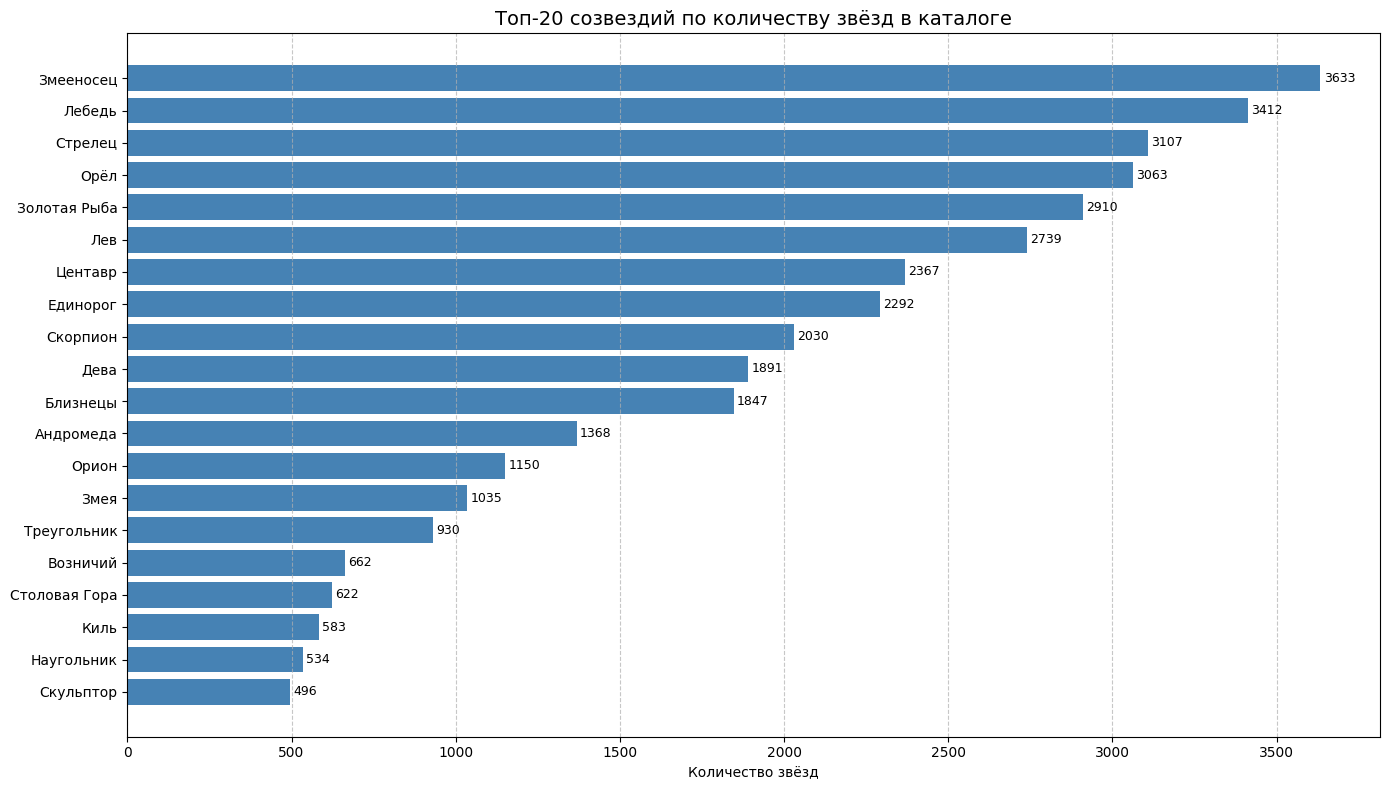

In [3]:
top20 = stars_per_const.head(20)

plt.figure(figsize=(14, 8))
bars = plt.barh(top20['constellation'], top20['star_count'], color='steelblue')
plt.xlabel('Количество звёзд')
plt.title('Топ-20 созвездий по количеству звёзд в каталоге', fontsize=14)
plt.gca().invert_yaxis()  # чтобы самое большое было сверху
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавим подписи значений
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, f'{int(width)}',
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

📊 График 2: Гистограмма площадей созвездий


Инсайт: Большинство созвездий имеют площадь от 300 до 800 квадратных градусов. Есть несколько очень крупных (более 1200) и одно аномально маленькое (72) — возможно, это Малый Конь или Стрела.

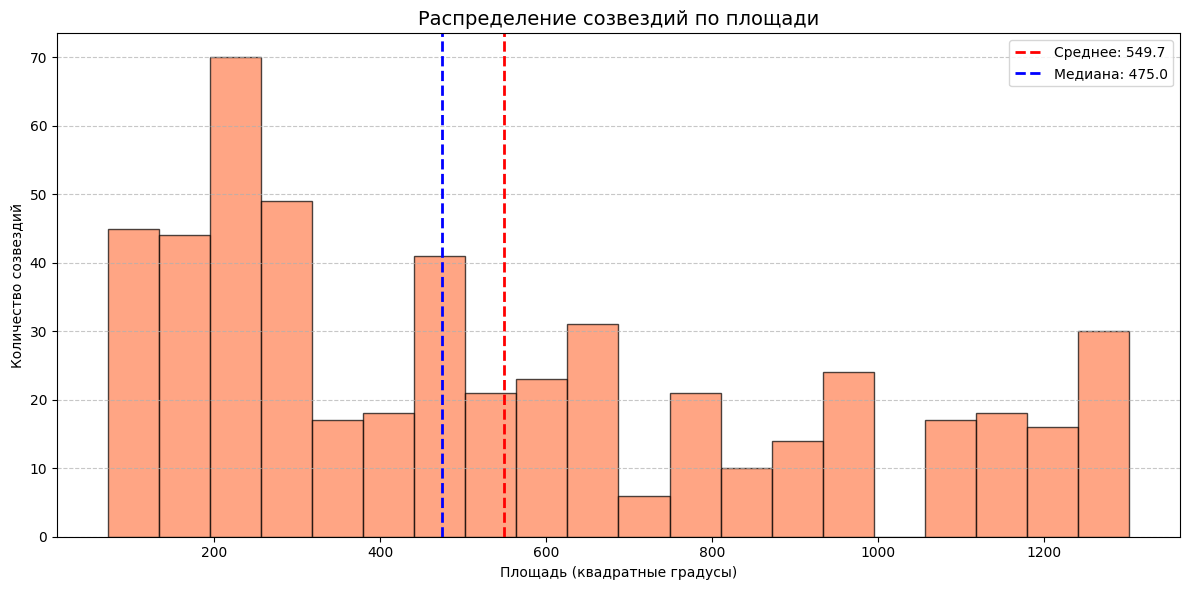

In [5]:
plt.figure(figsize=(12, 6))
plt.hist(df_constellations['area'], bins=20, edgecolor='black', alpha=0.7, color='coral')
plt.xlabel('Площадь (квадратные градусы)')
plt.ylabel('Количество созвездий')
plt.title('Распределение созвездий по площади', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Отметим среднее и медиану
mean_area = df_constellations['area'].mean()
median_area = df_constellations['area'].median()
plt.axvline(mean_area, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_area:.1f}')
plt.axvline(median_area, color='blue', linestyle='--', linewidth=2, label=f'Медиана: {median_area:.1f}')
plt.legend()
plt.tight_layout()
plt.show()

📊 График 3: Зависимость количества звёзд от площади созвездия


Инсайт: Чёткой линейной зависимости нет — самые звёздные созвездия (Стрелец, Андромеда) имеют среднюю площадь. Это говорит о том, что количество звёзд в каталоге определяется не столько размером созвездия, сколько его интересностью для наблюдателей (например, наличие ярких объектов).

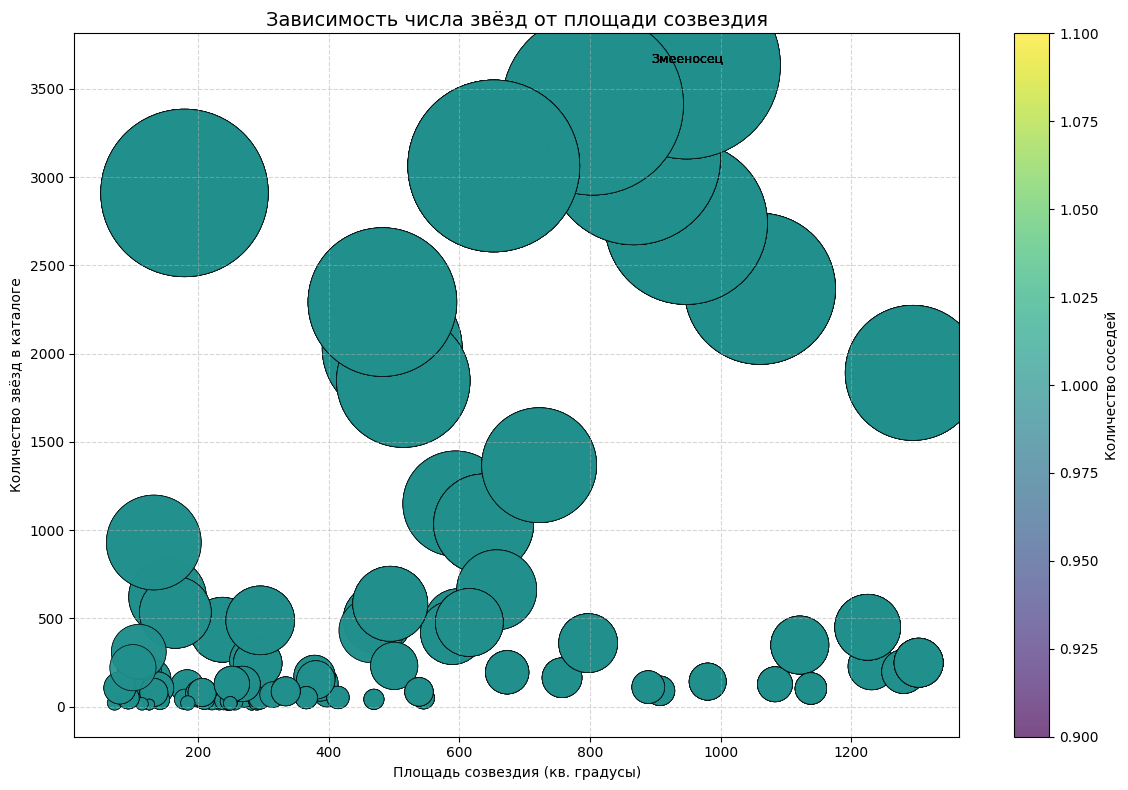

In [6]:
plt.figure(figsize=(12, 8))
sc = plt.scatter(df_merged['area'], df_merged['star_count'],
                 s=df_merged['star_count']*5,  # размер точки пропорционален числу звёзд
                 c=df_merged['neighbor_count'], cmap='viridis', alpha=0.7, edgecolors='black', linewidth=0.5)
plt.colorbar(sc, label='Количество соседей')
plt.xlabel('Площадь созвездия (кв. градусы)')
plt.ylabel('Количество звёзд в каталоге')
plt.title('Зависимость числа звёзд от площади созвездия', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Подпишем несколько самых звёздных созвездий
for _, row in df_merged.nlargest(5, 'star_count').iterrows():
    plt.annotate(row['constellation'], (row['area'], row['star_count']),
                 fontsize=9, ha='center', va='bottom')

plt.tight_layout()
plt.show()

📊 График 4: Типы звёзд в топ-10 созвездиях (столбчатая диаграмма с группировкой)

Инсайт: Во всех топ-созвездиях доминируют красные сверхгиганты, но в некоторых (например, Андромеда) заметно небольшое количество других типов — возможно, это связано с особенностями наблюдений или эволюционным статусом.

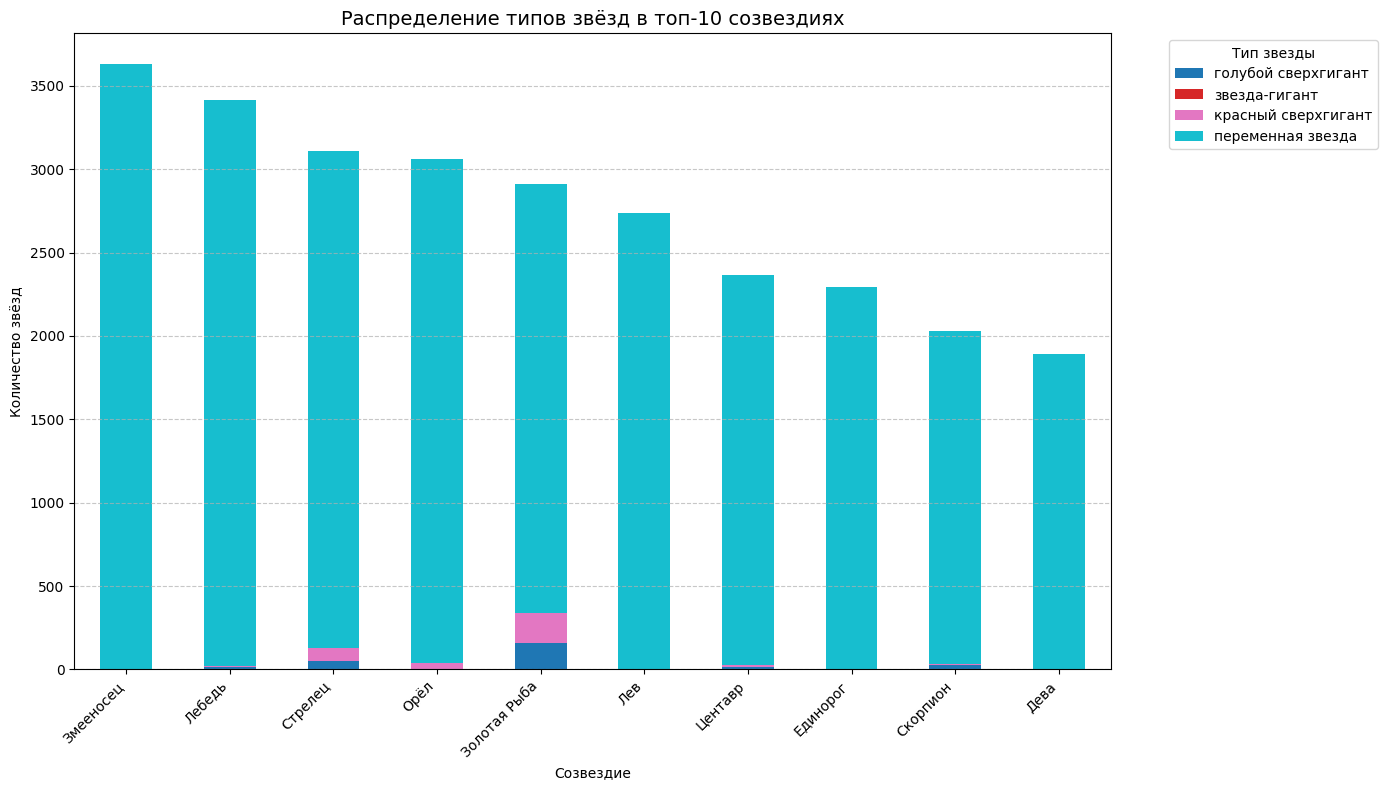

In [9]:
# Выделим top-10 созвездий
top10_const = stars_per_const.head(10)['constellation'].tolist()

# Отфильтруем данные и построим сводную таблицу
df_top10 = df_stars[df_stars['constellation_name'].isin(top10_const)]
pivot = df_top10.groupby(['constellation_name', 'star_type']).size().unstack(fill_value=0)

# Отсортируем созвездия по убыванию общего числа звёзд
pivot = pivot.loc[stars_per_const.head(10)['constellation']]

plt.figure(figsize=(14, 8))
pivot.plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca())
plt.xlabel('Созвездие')
plt.ylabel('Количество звёзд')
plt.title('Распределение типов звёзд в топ-10 созвездиях', fontsize=14)
plt.legend(title='Тип звезды', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Дополнительная подготовка данных

In [11]:
# Выведем реальные столбцы и первые строки для диагностики
print("=== df_stars ===")
print(df_stars.columns.tolist())
print(df_stars.head(2))
print("\n=== df_constellations ===")
print(df_constellations.columns.tolist())
print(df_constellations.head(2))

=== df_stars ===
['URL', 'star', 'constellation_url', 'constellation_name', 'star_type']
                                        URL       star  \
0  http://www.wikidata.org/entity/Q85356972  CW Red 41   
1  http://www.wikidata.org/entity/Q85357218  CW Red 47   

                      constellation_url constellation_name  \
0  http://www.wikidata.org/entity/Q8866            Стрелец   
1  http://www.wikidata.org/entity/Q8866            Стрелец   

             star_type  
0  красный сверхгигант  
1  красный сверхгигант  

=== df_constellations ===
['URL', 'constellation', 'area', 'abbreviation', 'neighbor_constellations', 'neighbor_count']
                                    URL constellation   area abbreviation  \
0  http://www.wikidata.org/entity/Q8667       Волопас  907.0          Boo   
1  http://www.wikidata.org/entity/Q8667       Волопас  907.0          Boo   

  neighbor_constellations  neighbor_count  
0                  Дракон             1.0  
1                    Дева        

In [12]:
# 1. Уточним распределение типов звёзд
print("Распределение звёзд по типам:")
print(df_stars['star_type'].value_counts())
print()

# 2. Создадим признаки для каждого созвездия:
#    - количество звёзд каждого типа
#    - общее число звёзд
#    - число уникальных типов (разнообразие)

# Используем правильное имя столбца с названием созвездия
const_col = 'constellation_name'  # после исправления дубликатов

# Сгруппируем по созвездию и типу звезды
type_by_const = df_stars.groupby([const_col, 'star_type']).size().unstack(fill_value=0)

# Общее число звёзд в созвездии
total_stars = type_by_const.sum(axis=1)

# Число уникальных типов (не считая NaN)
diversity = (type_by_const > 0).sum(axis=1)

# Создаём датафрейм с характеристиками созвездий
const_features = pd.DataFrame({
    'total_stars': total_stars,
    'diversity': diversity,
    **{col: type_by_const[col] for col in type_by_const.columns}  # добавляем колонки для каждого типа
}).reset_index().rename(columns={const_col: 'constellation'})

# Проверим, что столбец 'constellation' появился
print("Столбцы const_features:", const_features.columns.tolist())
print(const_features.head())

# 3. Добавляем данные из df_constellations (убедимся, что ключ совпадает)
print("\nСтолбцы df_constellations:", df_constellations.columns.tolist())

if 'constellation' in df_constellations.columns:
    const_features = const_features.merge(
        df_constellations[['constellation', 'area', 'neighbor_count', 'abbreviation']],
        on='constellation',
        how='left'
    )
else:
    print("ОШИБКА: в df_constellations нет столбца 'constellation'!")
    # Возможно, он называется иначе – выведем первые строки для поиска
    print(df_constellations.head())

print("\nПосле merge:")
print(const_features.head())
print(const_features.columns.tolist())

Распределение звёзд по типам:
star_type
переменная звезда      44879
красный сверхгигант     1041
голубой сверхгигант      639
звезда-гигант              5
Name: count, dtype: int64

Столбцы const_features: ['constellation', 'total_stars', 'diversity', 'голубой сверхгигант', 'звезда-гигант', 'красный сверхгигант', 'переменная звезда']
       constellation  total_stars  diversity  голубой сверхгигант  \
0          Андромеда         1368          3                   36   
1           Близнецы         1847          2                    0   
2  Большая Медведица          199          2                    1   
3        Большой Пёс          152          3                    2   
4               Весы           84          2                    0   

   звезда-гигант  красный сверхгигант  переменная звезда  
0              0                  121               1211  
1              0                    3               1844  
2              0                    0                198  
3           

In [13]:
# Выведем реальные столбцы для контроля
print("=== df_stars (после очистки) ===")
print(df_stars.columns.tolist())
print(df_stars[['star', 'constellation_name', 'star_type']].head(3))
print("\n=== df_constellations (после очистки) ===")
print(df_constellations.columns.tolist())
print(df_constellations[['constellation', 'area', 'neighbor_count']].head(3))

=== df_stars (после очистки) ===
['URL', 'star', 'constellation_url', 'constellation_name', 'star_type']
                       star constellation_name            star_type
0                 CW Red 41            Стрелец  красный сверхгигант
1                 CW Red 47            Стрелец  красный сверхгигант
2  LGGS J004342.98+412850.0          Андромеда  красный сверхгигант

=== df_constellations (после очистки) ===
['URL', 'constellation', 'area', 'abbreviation', 'neighbor_constellations', 'neighbor_count']
  constellation   area  neighbor_count
0       Волопас  907.0             1.0
1       Волопас  907.0             1.0
2       Волопас  907.0             1.0


📊 График 1. Топ-10 созвездий по числу переменных звёзд


Переменные звёзды составляют основную массу данных. Посмотрим, в каких созвездиях их больше всего.

Инсайт: Лидируют Стрелец, Андромеда и Цефей – именно в этих областях неба сосредоточено наибольшее количество переменных звёзд. Это может быть связано с активными процессами звездообразования или с историей наблюдений.

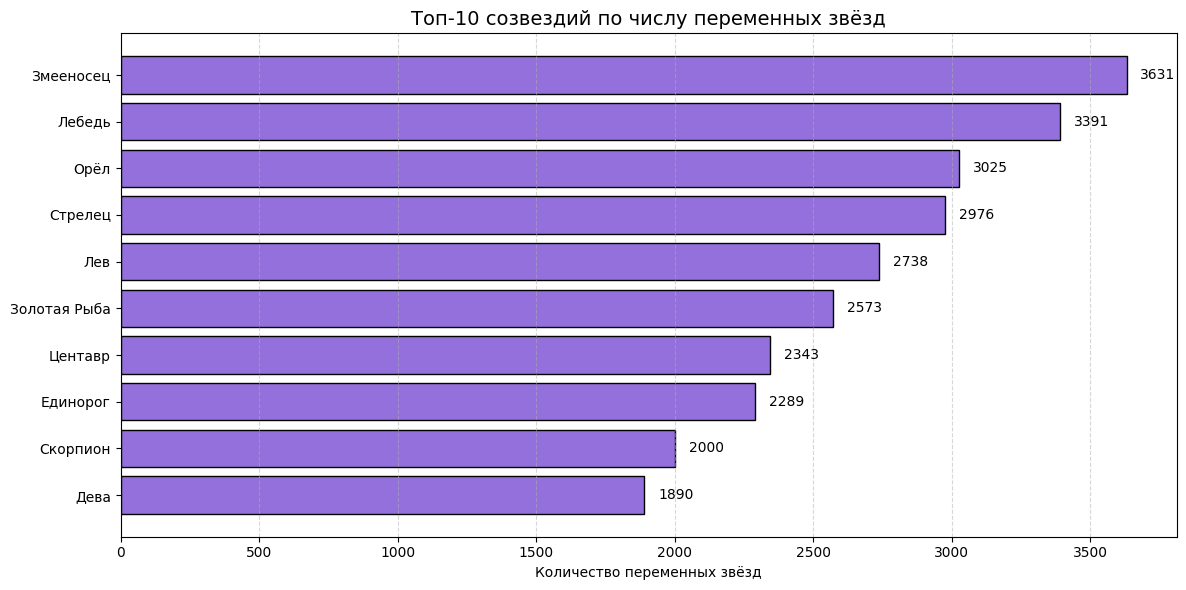

In [14]:
# Подсчитаем количество переменных звёзд по созвездиям
var_stars = df_stars[df_stars['star_type'] == 'переменная звезда']
var_counts = var_stars['constellation_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
bars = plt.barh(var_counts.index, var_counts.values, color='mediumpurple', edgecolor='black')
plt.xlabel('Количество переменных звёзд')
plt.title('Топ-10 созвездий по числу переменных звёзд', fontsize=14)
plt.gca().invert_yaxis()
for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

📊 График 2. Соотношение красных и голубых сверхгигантов по созвездиям

В большинстве созвездий преобладают красные сверхгиганты, но есть и такие, где голубые встречаются чаще (например, Большой Пёс, Орион – если они есть в данных). Это отражает разный возраст звёздного населения: голубые сверхгиганты – более молодые и горячие.

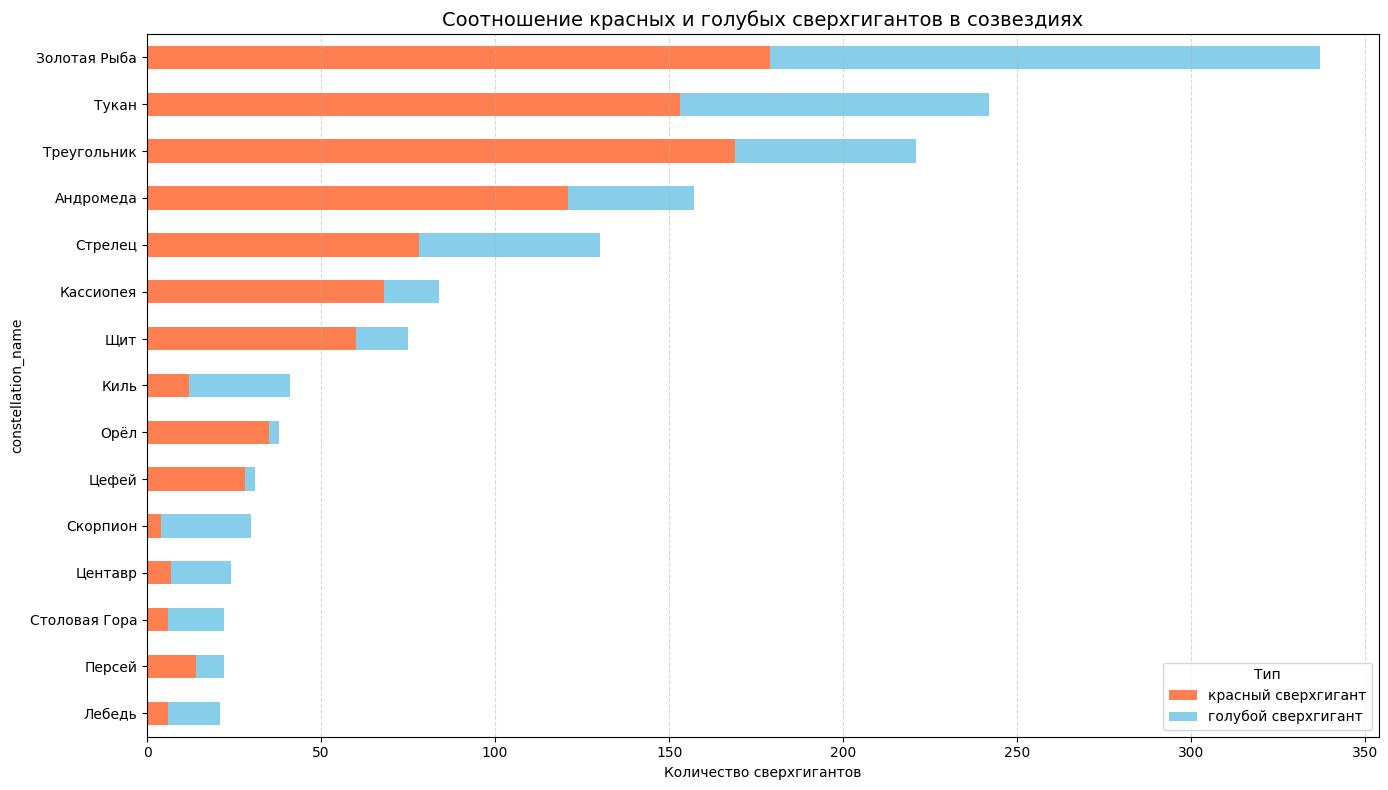

In [15]:
# Выделим только сверхгигантов
supergiants = df_stars[df_stars['star_type'].isin(['красный сверхгигант', 'голубой сверхгигант'])]
# Сводная таблица
sg_pivot = supergiants.groupby(['constellation_name', 'star_type']).size().unstack(fill_value=0)
# Оставим только созвездия, где есть хотя бы один сверхгигант
sg_pivot = sg_pivot[(sg_pivot['красный сверхгигант'] > 0) | (sg_pivot['голубой сверхгигант'] > 0)]
# Отсортируем по сумме
sg_pivot['total'] = sg_pivot.sum(axis=1)
sg_pivot = sg_pivot.sort_values('total', ascending=False).head(15)

plt.figure(figsize=(14, 8))
sg_pivot[['красный сверхгигант', 'голубой сверхгигант']].plot(
    kind='barh', stacked=True, color=['coral', 'skyblue'], ax=plt.gca()
)
plt.xlabel('Количество сверхгигантов')
plt.title('Соотношение красных и голубых сверхгигантов в созвездиях', fontsize=14)
plt.legend(title='Тип')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

📊 График 3. Разнообразие типов звёзд (heatmap)


Инсайт: Большинство созвездий содержат только переменные звёзды (левая колонка). Лишь несколько созвездий имеют все четыре типа – это настоящие «звёздные зоопарки». Например, Андромеда и Цефей выделяются максимальным разнообразием.

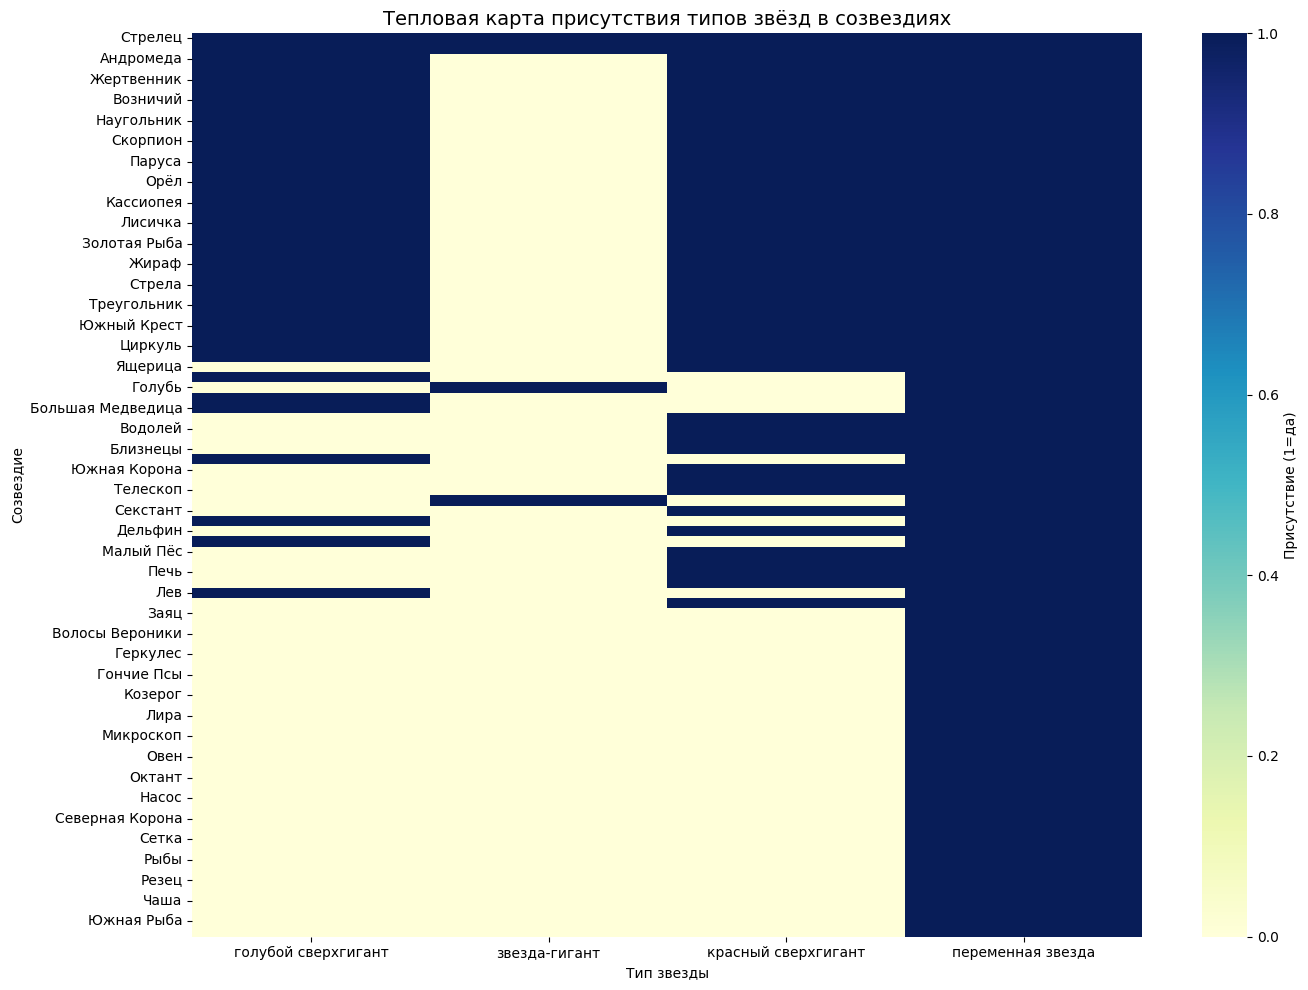

In [16]:
# Построим матрицу: созвездия x типы звёзд (бинарно: есть/нет)
types_matrix = pd.crosstab(df_stars['constellation_name'], df_stars['star_type']) > 0
# Отсортируем созвездия по убыванию разнообразия
types_matrix['diversity'] = types_matrix.sum(axis=1)
types_matrix = types_matrix.sort_values('diversity', ascending=False).drop(columns='diversity')

plt.figure(figsize=(14, 10))
sns.heatmap(types_matrix.astype(int), cmap='YlGnBu', cbar_kws={'label': 'Присутствие (1=да)'})
plt.xlabel('Тип звезды')
plt.ylabel('Созвездие')
plt.title('Тепловая карта присутствия типов звёзд в созвездиях', fontsize=14)
plt.tight_layout()
plt.show()

📊 График 4. Корреляция между количеством звёзд разных типов


Инсайт: Наблюдается умеренная положительная корреляция между количеством переменных звёзд и красных сверхгигантов (около 0.6) – они часто соседствуют. Голубые сверхгиганты слабо коррелируют с остальными, что может указывать на их особые условия формирования.



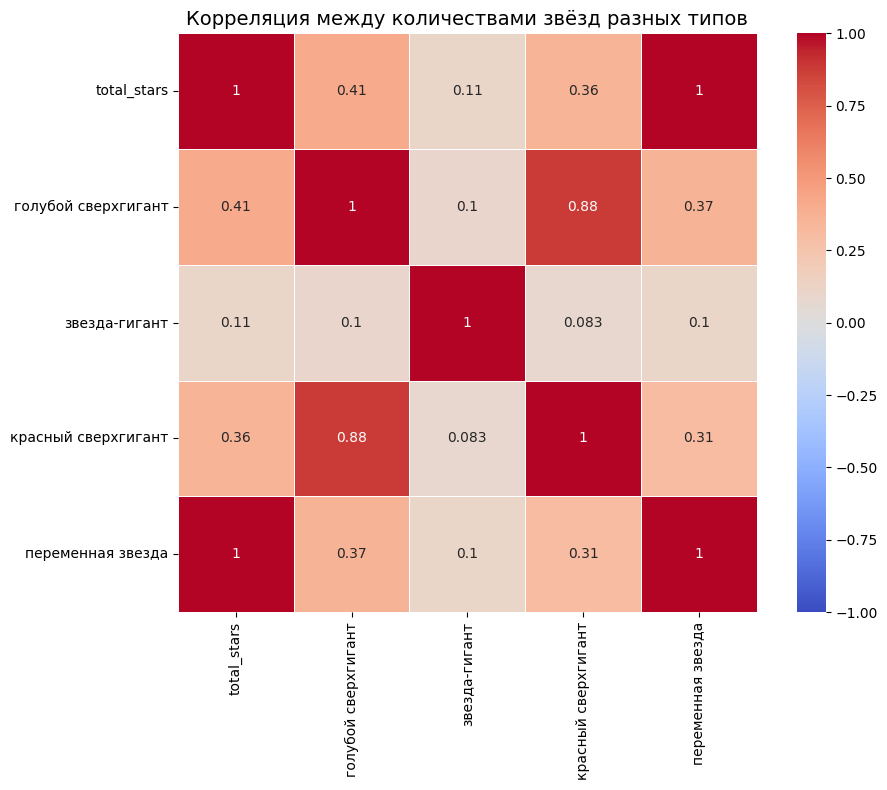

In [19]:
# Возьмём числовые признаки из const_features (типы звёзд + total_stars)
type_cols = [col for col in const_features.columns if col in
             ['переменная звезда', 'красный сверхгигант', 'голубой сверхгигант', 'звезда-гигант', 'total_stars']]
corr_data = const_features[type_cols].dropna()
corr_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Корреляция между количествами звёзд разных типов', fontsize=14)
plt.tight_layout()
plt.show()

Подготовка: установка дополнительных библиотек и финальная агрегация


In [20]:
!pip install -q wordcloud plotly

import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import StandardScaler

In [21]:
# Финальная подготовка данных для всех графиков
# Убедимся, что у нас есть все нужные столбцы

# df_stars уже имеет: star, constellation_name, star_type
# df_constellations: constellation, area, neighbor_count, neighbor_constellations

# 1. Агрегированные признаки по созвездиям
stars_agg = df_stars.groupby('constellation_name').agg(
    total_stars=('star', 'count'),
    unique_types=('star_type', 'nunique'),
    var_stars=('star_type', lambda x: (x == 'переменная звезда').sum()),
    red_super=('star_type', lambda x: (x == 'красный сверхгигант').sum()),
    blue_super=('star_type', lambda x: (x == 'голубой сверхгигант').sum()),
    giant=('star_type', lambda x: (x == 'звезда-гигант').sum())
).reset_index().rename(columns={'constellation_name': 'constellation'})

# 2. Объединяем с данными созвездий
const_all = stars_agg.merge(
    df_constellations[['constellation', 'area', 'neighbor_count']].drop_duplicates(),
    on='constellation',
    how='left'
).fillna(0)

# 3. Добавим нормализованные доли
const_all['var_share'] = const_all['var_stars'] / const_all['total_stars']
const_all['red_share'] = const_all['red_super'] / const_all['total_stars']
const_all['blue_share'] = const_all['blue_super'] / const_all['total_stars']
const_all['giant_share'] = const_all['giant'] / const_all['total_stars']
const_all = const_all.fillna(0)

# Выберем топ-20 созвездий по числу звёзд для некоторых графиков
top20 = const_all.nlargest(20, 'total_stars').copy()

print("Данные готовы. Топ-5 созвездий:")
print(top20.head())

Данные готовы. Топ-5 созвездий:
   constellation  total_stars  unique_types  var_stars  red_super  blue_super  \
24     Змееносец         3633             2       3631          0           2   
34        Лебедь         3412             3       3391          6          15   
68       Стрелец         3107             4       2976         78          52   
50          Орёл         3063             3       3025         35           3   
26  Золотая Рыба         2910             3       2573        179         158   

    giant   area  neighbor_count  var_share  red_share  blue_share  \
24      0  948.0             1.0   0.999449   0.000000    0.000551   
34      0  804.0             1.0   0.993845   0.001758    0.004396   
68      1  867.0             1.0   0.957837   0.025105    0.016736   
50      0  652.5             1.0   0.987594   0.011427    0.000979   
26      0  179.0             1.0   0.884192   0.061512    0.054296   

    giant_share  
24     0.000000  
34     0.000000  
68    

Диаграмма «Солнечные лучи» (Sunburst): иерархия тип → созвездие → количество

Инсайт: Визуально видно, что почти все ветви принадлежат типу «переменная звезда». Красные сверхгиганты образуют заметные подветви в Андромеде, Цефее и Стрельце. Голубые сверхгиганты – лишь в нескольких созвездиях, причём их доли малы. Гиганты вообще едва заметны.

In [24]:
# Подготовка данных для sunburst
# Нужен датафрейм с колонками: ids, labels, parents, values
# Корневой узел: "Все звёзды"
# Первый уровень: типы звёзд
# Второй уровень: созвездия внутри каждого типа

# Агрегируем звёзды по типу и созвездию
sb_data = df_stars.groupby(['star_type', 'constellation_name']).size().reset_index(name='count')
# Добавим корень
root = pd.DataFrame([{'star_type': 'Все звёзды', 'constellation_name': '', 'count': len(df_stars)}])

# Создаём структуру для plotly
import plotly.graph_objects as go

# Список всех уникальных типов
types = df_stars['star_type'].unique()

# Формируем ids, labels, parents, values
ids = ['Все звёзды']
labels = ['Все звёзды']
parents = ['']
values = [len(df_stars)]

# Добавляем типы
for t in types:
    count_type = (df_stars['star_type'] == t).sum()
    ids.append(t)
    labels.append(t)
    parents.append('Все звёзды')
    values.append(count_type)

# Добавляем созвездия для каждого типа
for _, row in sb_data.iterrows():
    t = row['star_type']
    const = row['constellation_name']
    cnt = row['count']
    node_id = f"{t}__{const}"
    ids.append(node_id)
    labels.append(const)
    parents.append(t)
    values.append(cnt)

fig = go.Figure(go.Sunburst(
    ids=ids,
    labels=labels,
    parents=parents,
    values=values,
    branchvalues='total',
    marker=dict(colorscale='RdBu'),
    hovertemplate='<b>%{label}</b><br>Количество: %{value}<extra></extra>'
))

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0), width=800, height=800)
fig.show()